In [16]:
from exp_util import load_json, plot_staircase_results
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from itertools import product


In [73]:
data = pd.read_csv("/home/maciek/data/counterfactual_dots/raw/pilot_data/counterfactual_staircase_test_L_1742812458.61419.csv")
data.head()

,subject,gender (m/f/o),age,block,trial_number,dots_direction,scale_direction,response_key,response_correct,opposite_strenght,opposite_label,step,signal_prop,scale_response,rt
0,test_L,o,69,0,0,0.0,1,right,True,0.15,high,8,0.625,82.53,NaN
1,test_L,o,69,0,1,0.0,0,right,True,0.05,low,16,0.525,61.25,NaN
2,test_L,o,69,0,2,180.0,1,left,True,0.15,high,8,0.625,74.46,0.455861
3,test_L,o,69,0,3,180.0,0,left,True,0.05,low,16,0.525,63.70,1.503228
4,test_L,o,69,0,4,180.0,1,left,True,0.05,low,20,0.425,84.48,NaN


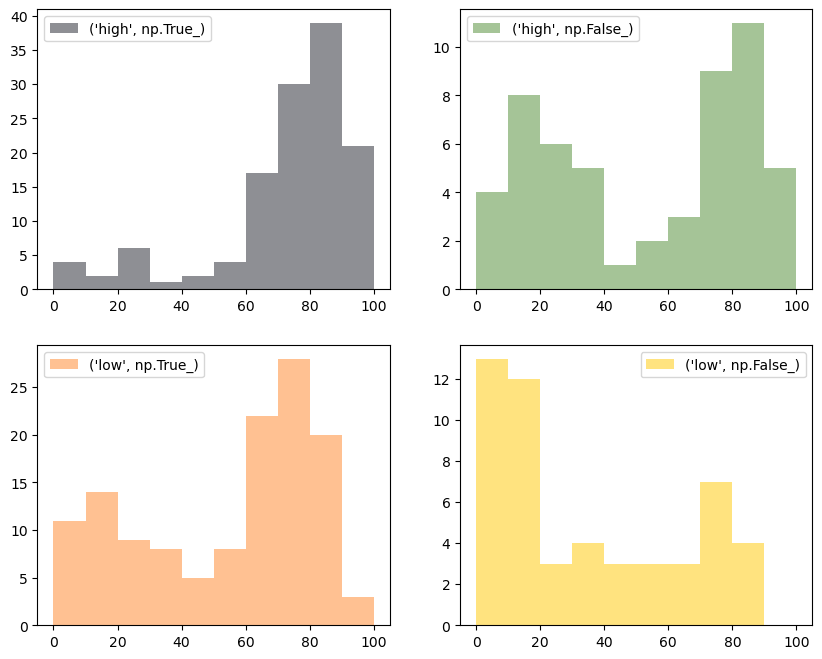

In [74]:
f, ax = plt.subplots(2, 2, figsize=(10, 8))
colors = ["#1E212B", "#4D8B31", "#FF8427", "#FFC800"]
ax = ax.flatten()
for ix, lab in enumerate(list(product(data.opposite_label.unique(), data.response_correct.unique()))):
    select = (data.opposite_label == lab[0]) & (data.response_correct == lab[1])
    ax[ix].hist(data.scale_response[select], color=colors[ix], label=str(lab), alpha=0.5, bins=np.linspace(0, 100, num=11))
    ax[ix].legend()

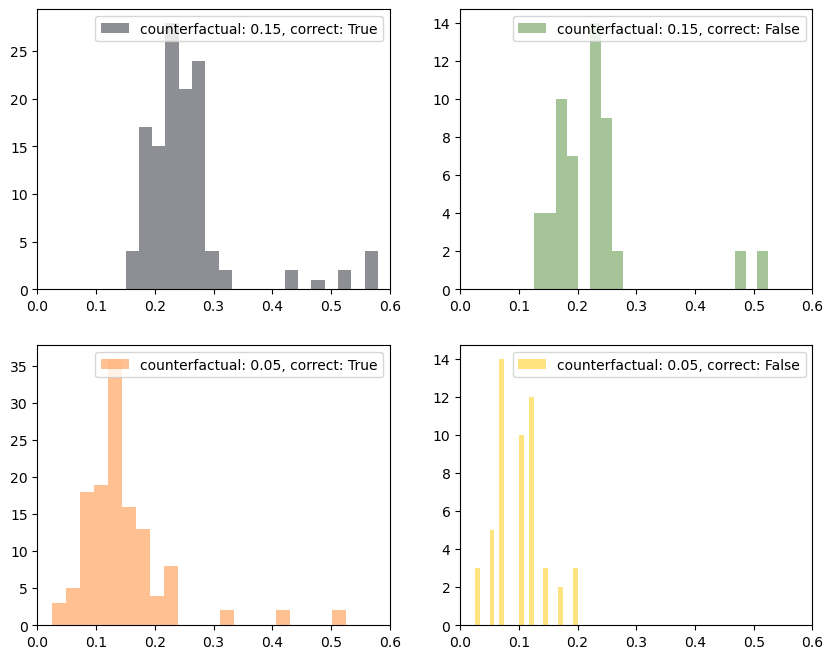

In [89]:
f, ax = plt.subplots(2, 2, figsize=(10, 8))
colors = ["#1E212B", "#4D8B31", "#FF8427", "#FFC800"]
ax = ax.flatten()
for ix, lab in enumerate(list(product(data.opposite_strenght.unique(), data.response_correct.unique()))):
    select = (data.opposite_strenght == lab[0]) & (data.response_correct == lab[1])
    ax[ix].hist(data.signal_prop[select], color=colors[ix], label=f"counterfactual: {str(lab[0])}, correct: {str(lab[1])}", alpha=0.5, bins=21)
    ax[ix].legend()
    ax[ix].set_xlim(0.0, 0.6)

In [65]:
np.linspace(0, 100, num=21)

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

In [39]:
data[select].index

Index([  3,  19,  21,  22,  32,  34,  42,  45,  47,  50,  51,  61,  64,  67,
        70,  72,  80,  83,  85,  88,  89,  90,  92, 107, 114, 119, 120, 125,
       130, 136, 139, 140, 143, 148, 149, 155, 157, 165, 166, 172, 178, 182,
       184, 188, 191, 194, 196, 198, 212, 213, 224, 225, 239, 253, 254, 260,
       263, 266, 269, 285, 294, 303, 321, 322, 325, 327, 329, 337, 353, 354],
      dtype='int64')